# Analisis preliminar del conjunto de datos

In [80]:
#Importaciones
import pandas as pd
import numpy as np

#Para llamar a archivos de otras carpetas
import sys
sys.path.append('..')

#importar la función reduce para pode rusarla
from functools import reduce

#Visualizar todas las columnas
pd.set_option('display.max_columns', None)


In [81]:
#Después importamos el archivo de funciones ('sp_limpieza.py') 
import src.sp_limpieza as sp
#Importamos importlib para poder recargar el módulo y reflejar los cambios actualizados
import importlib  
importlib.reload(sp) 

<module 'src.sp_limpieza' from 'c:\\Users\\pooo_\\Desktop\\Hackio\\proyecto_final_troncal\\analisis_eda_proyecto_final\\jupyters\\..\\src\\sp_limpieza.py'>

In [82]:
#Para interactuar con el sistema operativo
import os
#Devuelve la ruta del directorio actual
print(os.getcwd())

c:\Users\pooo_\Desktop\Hackio\proyecto_final_troncal\analisis_eda_proyecto_final\jupyters


In [83]:
#Librerías visualización de gráficos
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Transformación y limpieza de datos

### 1.1. Importación de los datos

In [84]:
#Leer los archivos
df_attendance = pd.read_csv("../data/data_raw/attendance.csv", index_col = 0)
df_homework = pd.read_csv("../data/data_raw/homework.csv", index_col = 0)
df_performance = pd.read_csv("../data/data_raw/performance.csv", index_col = 0)
df_students = pd.read_csv("../data/data_raw/students.csv", index_col = 0)
df_communication = pd.read_csv("../data/data_raw/communication.csv", index_col = 0)

### 1.2. Limpieza y transformación de los datos


In [85]:
#Ver dataframe 'df_attendace'
df_att_preliminar =  sp.eda_preliminar(df_attendance)

,Date,Subject,Attendance_Status
Student_ID,,,
S08457,2024-09-01,English,PRESENT
S04267,2024-09-25,Math,Present
S00489,2025-02-08,History,Late
S10214,2024-03-28,Arabic,excused
S01135,2024-11-18,English,PRESENT


____________________________
INFO
<class 'pandas.core.frame.DataFrame'>
Index: 364680 entries, S06592 to S12134
Data columns (total 3 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Date               364680 non-null  object
 1   Subject            364680 non-null  object
 2   Attendance_Status  364680 non-null  object
dtypes: object(3)
memory usage: 11.1+ MB


None

____________________________
NULOS


Date                 0.0
Subject              0.0
Attendance_Status    0.0
dtype: float64

____________________________
DUPLICADOS


np.int64(347112)

____________________________
DESCRIBE


,count,unique,top,freq
Date,364680,366,2024-12-31,1075
Subject,364680,6,Math,61241
Attendance_Status,364680,8,PRESENT,45982


____________________________
DESCRIBE COLUMNAS OBJECT


,count,unique,top,freq
Date,364680,366,2024-12-31,1075
Subject,364680,6,Math,61241
Attendance_Status,364680,8,PRESENT,45982


____________________________
VALUE COUNTS
Date
2024-12-31    1075
2024-05-05    1073
2024-09-06    1070
2024-08-06    1068
2024-09-22    1068
              ... 
2024-12-25     922
2024-05-09     921
2024-03-31     919
2024-12-07     917
2024-04-21     905
Name: count, Length: 366, dtype: int64
Subject
Math         61241
Science      60881
Arabic       60749
English      60684
Geography    60640
History      60485
Name: count, dtype: int64
Attendance_Status
PRESENT       45982
Absent        45751
Present       45632
Late          45509
 late         45508
absnt         45478
left early    45435
excused       45385
Name: count, dtype: int64
____________________________


In [86]:
#Quitar los espacios y pasar a misnuculas las tabla
df_attendance = sp.valores_a_minus(df_attendance)
df_attendance.sample(10)

,date,subject,attendance_status
student_id,,,
s02221,2024-05-12,arabic,left early
s08673,2024-08-24,history,late
s02271,2024-11-03,math,absent
s04697,2025-01-28,math,late
s10205,2024-05-29,english,late
s10706,2024-11-12,geography,present
s08474,2025-02-01,science,late
s00761,2024-10-26,history,absent
s00051,2024-04-17,arabic,absent


In [87]:
#Ver en la columna attendance_status que valores tiene.
conteo = df_attendance['attendance_status'].value_counts()
conteo

attendance_status
present       91614
late          91017
absent        45751
absnt         45478
left early    45435
excused       45385
Name: count, dtype: int64

In [88]:
#Corregimos el valor 'absnt' por 'absent' y comprobamos los resultados de la columna
df_attendance['attendance_status'] = df_attendance['attendance_status'].replace('absnt','absent')

conteo = df_attendance['attendance_status'].value_counts()
conteo
#Ya tenemos los valores de esta columna corregidos.

attendance_status
present       91614
absent        91229
late          91017
left early    45435
excused       45385
Name: count, dtype: int64

In [89]:
#Cambiar nombre de columna 'date' para hacerla mas descriptiva y 'attendace_status' para hacerla mas corta.
df_attendance.rename(columns={'date':'att_date', 'attendance_status':'att_status'}, inplace= True)

In [90]:
# Como la columna 'date' es de tipo 'Object' vamos a pasarla a tipo Datetime y comprobamos el tipo de dato que sea correct
df_attendance = sp.convertir_columna_a_fecha(df_attendance, 'att_date')
df_attendance.sample(10)

Columna 'att_date' convertida a datetime con formato %Y-%m-%d.


,att_date,subject,att_status
student_id,,,
s02885,2025-01-09,math,left early
s01002,2024-05-12,english,left early
s00232,2024-03-22,arabic,absent
s07205,2025-01-06,geography,present
s00665,2024-05-11,science,absent
s00831,2025-02-05,arabic,present
s01789,2024-07-19,science,left early
s03102,2025-02-20,history,late
s04599,2025-02-06,history,present


In [91]:
#Comprobación del tipo de dato de la columna
print(df_attendance['att_date'].dtype)

datetime64[ns]


In [92]:
#Comprobamos el resto de columnas que sean de tipo correcto.
print(df_attendance.dtypes)

att_date      datetime64[ns]
subject               object
att_status            object
dtype: object


In [93]:
#Ver dataframe 'df_homework'
df_hw_preliminar =  sp.eda_preliminar(df_homework)
df_hw_preliminar

,Subject,Assignment_Name,Due_Date,Status,Grade_Feedback,Guardian_Signature
Student_ID,,,,,,
S04829,Science,Keep star plan address.,2024-11-24,not done,A,No
S07707,Geography,Site because among draw.,2025-02-23,❌,C,No
S09051,Geography,May appear lose.,2024-10-25,❌,C-,No
S03207,History,Suggest light administration own.,2024-12-21,✔,B-,Yes
S08517,Arabic,Democratic.,2024-09-08,Done,B-,Yes


____________________________
INFO
<class 'pandas.core.frame.DataFrame'>
Index: 60780 entries, S12002 to S08589
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Subject             60780 non-null  object
 1   Assignment_Name     60780 non-null  object
 2   Due_Date            60780 non-null  object
 3   Status              60780 non-null  object
 4   Grade_Feedback      60780 non-null  object
 5   Guardian_Signature  60780 non-null  object
dtypes: object(6)
memory usage: 3.2+ MB


None

____________________________
NULOS


Subject               0.0
Assignment_Name       0.0
Due_Date              0.0
Status                0.0
Grade_Feedback        0.0
Guardian_Signature    0.0
dtype: float64

____________________________
DUPLICADOS


np.int64(0)

____________________________
DESCRIBE


,count,unique,top,freq
Subject,60780,6,English,10209
Assignment_Name,60780,56065,Also.,15
Due_Date,60780,366,2025-01-23,315
Status,60780,6,Done,10278
Grade_Feedback,60780,8,A+,7709
Guardian_Signature,60780,3,No,20372


____________________________
DESCRIBE COLUMNAS OBJECT


,count,unique,top,freq
Subject,60780,6,English,10209
Assignment_Name,60780,56065,Also.,15
Due_Date,60780,366,2025-01-23,315
Status,60780,6,Done,10278
Grade_Feedback,60780,8,A+,7709
Guardian_Signature,60780,3,No,20372


____________________________
VALUE COUNTS
Subject
English      10209
Geography    10179
Science      10112
History      10110
Arabic       10106
Math         10064
Name: count, dtype: int64
Assignment_Name
Also.                      15
Term.                      15
Understand.                13
Not.                       13
Eye.                       12
                           ..
Effect job amount.          1
Study indicate fight.       1
Reach whose investment.     1
Suggest figure.             1
Involve determine.          1
Name: count, Length: 56065, dtype: int64
Due_Date
2025-01-23    315
2025-03-02    302
2024-11-06    301
2024-11-08    300
2024-12-25    299
             ... 
11/04/2024     52
10/13/2024     51
12/21/2024     50
11/22/2024     50
03/01/2025     46
Name: count, Length: 366, dtype: int64
Status
 Done       10278
not done    10234
❌           10151
✔           10090
pending     10014
✅           10013
Name: count, dtype: int64
Grade_Feedback
A+    7709
B-    7639

In [94]:
#Pasar dataframe a minusculas
df_homework = sp.valores_a_minus(df_homework)
df_homework.sample(10)

,subject,assignment_name,due_date,status,grade_feedback,guardian_signature
student_id,,,,,,
s03003,history,adult lead.,2025-01-13,not done,a+,yes
s01008,english,never.,2024-10-14,not done,c-,no
s01301,math,nearly move under.,2024-09-12,❌,a+,no
s08004,english,region ten social station.,2025-01-28,pending,c-,
s09091,english,field reality later.,2024-12-31,not done,a+,no
s11695,history,camera culture production.,2024-12-28,✅,f,yes
s00317,math,particular program environment sound.,2025-03-05,✅,d,yes
s07910,geography,none through guess.,2024-12-20,pending,c,yes
s12099,math,public recognize.,2024-09-08,❌,b,yes


In [95]:
#La columna 'due_date' tiene valores de fecha con diferentes formatos.
# Hay que pasarlo a un formato y asignalo como de tipo datetime.

df_homework = sp.convertir_columna_a_fecha(df_homework, 'due_date')
df_homework.sample(10)

Columna 'due_date' convertida a datetime con formato %Y-%m-%d.


,subject,assignment_name,due_date,status,grade_feedback,guardian_signature
student_id,,,,,,
s01635,english,despite drive west.,2024-10-12,❌,c,
s02179,science,trial point practice recently.,2025-02-26,not done,a+,
s03909,arabic,happy determine.,2024-11-10,✅,a,yes
s06531,math,yeah usually partner.,NaT,not done,a+,no
s05462,science,strong.,2025-03-03,✅,c-,yes
s04807,history,provide capital.,2024-12-22,✔,b-,yes
s08797,science,child anyone.,2024-10-15,✔,f,yes
s01508,english,three he on.,NaT,pending,b-,no
s04634,geography,morning energy fast.,2024-09-22,pending,b,no


In [96]:
#Comprobación del tipo de dato de la columna
print(df_homework['due_date'].dtype)

datetime64[ns]


In [97]:
#Sacar nulos de la columna 'due_date' mediante funcion de sp.limpieza.py
nulos = sp.nulos_num_porcentaje(df_homework)
print(nulos)

(subject                   0
assignment_name           0
due_date              12358
status                    0
grade_feedback            0
guardian_signature        0
dtype: int64, subject                0.00
assignment_name        0.00
due_date              20.33
status                 0.00
grade_feedback         0.00
guardian_signature     0.00
dtype: float64)


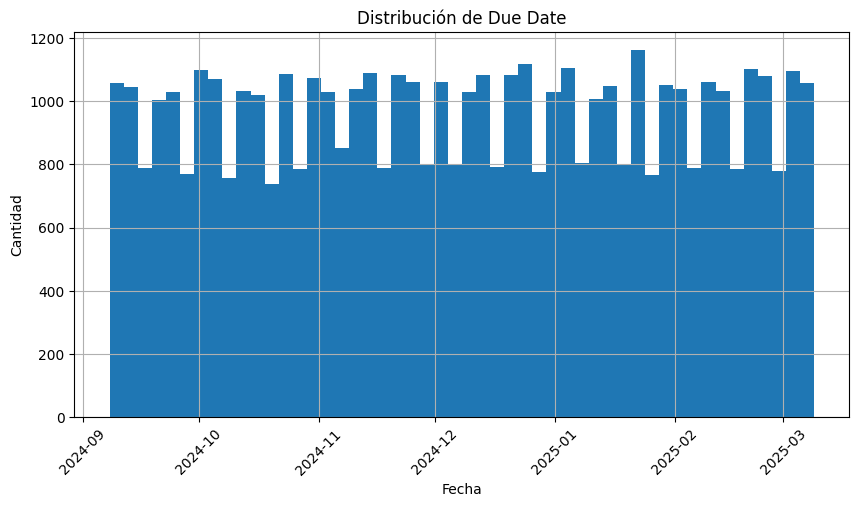

In [98]:
#🔴🔴 VALORAR SI ESTO MERECE O ME QUEDO SOLO CON LA CELDA DE ABAJO, QUE PONE --> describe().
# La columna 'due_date' tiene una cantidad elevada de nulos (20.33%) por lo que antes de imputarla comprobamos
#como es la distribución de sus valores para poder así valorar si imputar los nulos, si por media, moda o mediana.

df_homework['due_date'].hist(bins=50, figsize=(10,5))
plt.title('Distribución de Due Date')
plt.xlabel('Fecha')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)
plt.show()


In [99]:
print(df_homework['due_date'].describe())

count                            48422
mean     2024-12-08 09:02:43.710710016
min                2024-09-08 00:00:00
25%                2024-10-24 00:00:00
50%                2024-12-09 00:00:00
75%                2025-01-23 00:00:00
max                2025-03-09 00:00:00
Name: due_date, dtype: object


In [100]:
#Dado que las fechas están bastante centradas en torno a finales de 2024, lo más razonable sería:
# Imputar con la mediana (50%), que es 2024-12-09, ya que la mediana es robusta frente a outliers y nos va a evitar 
# en caso de haber un par de fechas raras que el resultado no se distorsione demasiado.

mediana_fecha = df_homework['due_date'].median()
df_homework['due_date'].fillna(mediana_fecha, inplace= True)


C:\Users\pooo_\AppData\Local\Temp\ipykernel_19976\3655258861.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_homework['due_date'].fillna(mediana_fecha, inplace= True)


In [101]:
#Comprobamos que los nulos han desaparecido
nulos = sp.nulos_num_porcentaje(df_homework)
print(nulos)

(subject               0
assignment_name       0
due_date              0
status                0
grade_feedback        0
guardian_signature    0
dtype: int64, subject               0.0
assignment_name       0.0
due_date              0.0
status                0.0
grade_feedback        0.0
guardian_signature    0.0
dtype: float64)


In [102]:
#Para coregir la columna 'status' vamos a comprobar primero el tipo de valores que tiene.
status_valores = df_homework['status'].value_counts()
status_valores

status
done        10278
not done    10234
❌           10151
✔           10090
pending     10014
✅           10013
Name: count, dtype: int64

In [103]:
#Vamos a homogeinizar esos valores. 
mapeo_status = {
    '✅':'done',
    '❌':'not done',
    '✔':'done',
    'pending':'pending',
    'done':'done',
    'not done':'not done',
}

df_homework['status'] = df_homework['status'].replace(mapeo_status)

status_valores = df_homework['status'].value_counts()
status_valores


status
done        30381
not done    20385
pending     10014
Name: count, dtype: int64

In [104]:
#Debemos comprobar la columna 'guardian_signatura' ya que tiene campos vacíos que pandas
# lo detecta como cadena de texto vacía.
valores = df_homework['guardian_signature'].value_counts()
print(valores)

guardian_signature
no     20372
yes    20348
       20060
Name: count, dtype: int64


In [105]:
#Debemos de convertir la cadena vacia por nulos de numpy. Después vamos a comprobar cuantos nulos son.
df_homework['guardian_signature'] = df_homework['guardian_signature'].replace('', np.nan)
ver_nulos= sp.nulos_num_porcentaje(df_homework['guardian_signature'])
ver_nulos

(np.int64(20060), np.float64(33.0))

In [106]:
#Comprobamos la distribución (en porcentaje) de los 3 valores de la columna.
print(df_homework['guardian_signature'].value_counts(dropna=False, normalize=True)*100)

guardian_signature
no     33.517604
yes    33.478118
NaN    33.004278
Name: proportion, dtype: float64


In [107]:
#Hay un 33% de nulos de la columna 'guardian_signature' por tanto vamos a ver sus cuartiles, media etc.
print(df_homework['guardian_signature'].describe())

count     40720
unique        2
top          no
freq      20372
Name: guardian_signature, dtype: object


In [108]:
#Vamos a imputar los nulos con 'unknown' ya que así no modificamos artificialmente la proporción original y
# dejamos constancia de que falta esta información.

df_homework['guardian_signature'].fillna('unknown', inplace = True)

#Comprobamos la distribución (en porcentaje) de los 3 valores de la columna.
print(df_homework['guardian_signature'].value_counts())

guardian_signature
no         20372
yes        20348
unknown    20060
Name: count, dtype: int64


C:\Users\pooo_\AppData\Local\Temp\ipykernel_19976\2920811997.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_homework['guardian_signature'].fillna('unknown', inplace = True)


In [109]:
df_homework.sample(10)

,subject,assignment_name,due_date,status,grade_feedback,guardian_signature
student_id,,,,,,
s01478,math,crime set own.,2024-10-03,done,a+,no
s11427,science,wrong especially third.,2024-09-23,done,c-,unknown
s03556,arabic,phone.,2024-12-09,not done,b,yes
s07785,geography,matter region.,2024-10-28,not done,b-,yes
s09745,science,improve dog great.,2024-10-08,not done,a+,no
s10459,math,offer close political.,2024-12-09,done,a,unknown
s08421,arabic,century reality democratic.,2024-10-04,done,d,unknown
s05713,arabic,size drive.,2024-10-27,pending,b-,no
s08709,math,old i.,2024-09-18,pending,b,yes


In [110]:
#Ver dataframe 'df_communication'
df_comm_preliminar =  sp.eda_preliminar(df_communication)
df_comm_preliminar

,Date,Message_Type,Message_Content
Student_ID,,,
S04862,2025-01-01,Teacher to Parent,
S03646,2025-01-09,Parent to Teacher,
S05451,2025-02-26,Parent to Teacher,Next market now night size create something th...
S10645,2024-11-06,Teacher to Parent,Oil wife off parent study modern chair because...
S04464,2024-10-19,Parent to Teacher,Determine home class wind identify billion lig...


____________________________
INFO
<class 'pandas.core.frame.DataFrame'>
Index: 24312 entries, S01133 to S03501
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Date             24312 non-null  object
 1   Message_Type     24312 non-null  object
 2   Message_Content  24312 non-null  object
dtypes: object(3)
memory usage: 759.8+ KB


None

____________________________
NULOS


Date               0.0
Message_Type       0.0
Message_Content    0.0
dtype: float64

____________________________
DUPLICADOS


np.int64(737)

____________________________
DESCRIBE


,count,unique,top,freq
Date,24312,183,2025-02-18,164
Message_Type,24312,3,Teacher to Parent,8149
Message_Content,24312,23086,,1227


____________________________
DESCRIBE COLUMNAS OBJECT


,count,unique,top,freq
Date,24312,183,2025-02-18,164
Message_Type,24312,3,Teacher to Parent,8149
Message_Content,24312,23086,,1227


____________________________
VALUE COUNTS
Date
2025-02-18    164
2024-12-27    163
2025-03-02    163
2024-10-24    157
2024-10-06    156
             ... 
2024-09-20    110
2024-12-03    108
2024-10-10    108
2025-02-22    107
2024-11-21    103
Name: count, Length: 183, dtype: int64
Message_Type
Teacher to Parent     8149
Automated Reminder    8106
Parent to Teacher     8057
Name: count, dtype: int64
Message_Content
                                                                                                                                                            1227
Than far indeed gun doctor concern hear whose policy people board traditional.                                                                                 1
Than time unit nearly wrong man blue probably yes season civil car later both from those.                                                                      1
Around positive side your city top common pretty again agent.                                    

In [111]:
df_communication = sp.valores_a_minus(df_communication)
df_communication.sample(10)

,date,message_type,message_content
student_id,,,
s06546,2024-10-03,parent to teacher,bag loss walk final onto local reflect black in.
s03229,2024-11-09,teacher to parent,
s06468,2025-02-02,parent to teacher,culture tell drug run benefit audience ask fie...
s01885,2025-02-16,parent to teacher,late network individual reality good hundred a...
s07664,2024-11-03,parent to teacher,sing song certainly outside trouble side south...
s05536,2025-02-15,automated reminder,mean computer sort themselves energy create he...
s01774,2024-09-26,parent to teacher,ability culture be near sport maybe option als...
s02342,2024-10-09,parent to teacher,down sense employee case go accept statement c...
s05435,2025-01-03,automated reminder,per above fly response hear quickly order tech...


In [112]:
#Cambiar el nombre de date a uno mas descriptivo y convertirlo a tipo datetime
df_communication.rename(columns={'date':'date_message'}, inplace=True)

df_communication = sp.convertir_columna_a_fecha(df_communication, 'date_message')
df_communication.sample(10)

Columna 'date_message' convertida a datetime con formato %Y-%m-%d.


,date_message,message_type,message_content
student_id,,,
s09011,2025-03-05,automated reminder,rise could capital understand a either try may...
s06795,2024-09-29,automated reminder,citizen office read explain all police week fi...
s00200,2025-01-30,parent to teacher,so conference be adult notice fill involve you...
s08604,2024-12-20,teacher to parent,grow save character television democratic degr...
s00664,2024-10-25,parent to teacher,others class institution above far crime behin...
s06841,2024-11-22,teacher to parent,girl decide mother quite care great popular re...
s10111,2025-01-25,automated reminder,choice though run church radio figure human be...
s00552,2025-02-09,teacher to parent,watch realize seem amount message ball concern...
s08119,2025-01-31,parent to teacher,right share left direction many who worker ord...


In [113]:
#Comprobación del tipo de dato de la columna
print(df_communication['date_message'].dtype)

datetime64[ns]


In [114]:
#Comprobar los valores que hay en la columna 'date_message'
print(df_communication['message_type'].value_counts())

message_type
teacher to parent     8149
automated reminder    8106
parent to teacher     8057
Name: count, dtype: int64


In [115]:
#Viendo la columna 'message_content' a través de la funcion eda_preliminar parece que hay campos vacíos (cadenas de texto vacías)
# que no figuran como nulos.

df_communication['message_content'] = df_communication['message_content'].replace('', np.nan)
ver_nulos= sp.nulos_num_porcentaje(df_communication['message_content'])
ver_nulos

(np.int64(1227), np.float64(5.05))

In [116]:
#Eliminamos los nulos de 'message_content' ya que son escasos y buscamos tener el  dataframe lo más limpio posible.
df_communication = df_communication.dropna(subset=['message_content'])

In [117]:
df_prfm_preliminar = sp.eda_preliminar(df_performance)
df_prfm_preliminar

,Subject,Exam_Score,Homework_Completion_%,Teacher_Comments
Student_ID,,,,
S03747,History,86,90,Prepare newspaper past mouth sure up quite sec...
S07074,History,47,90,Would short price make magazine into.
S10807,History,71,80%,Idea above per third tax situation.
S03618,Math,109,90,Production mouth middle fact able miss drive h...
S05344,History,91,80%,Choice food training build half and reason gun...


____________________________
INFO
<class 'pandas.core.frame.DataFrame'>
Index: 36468 entries, S00396 to S09604
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Subject                36468 non-null  object
 1   Exam_Score             36468 non-null  int64 
 2   Homework_Completion_%  36468 non-null  object
 3   Teacher_Comments       36468 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.4+ MB


None

____________________________
NULOS


Subject                  0.0
Exam_Score               0.0
Homework_Completion_%    0.0
Teacher_Comments         0.0
dtype: float64

____________________________
DUPLICADOS


np.int64(1858)

____________________________
DESCRIBE


,count,mean,std,min,25%,50%,75%,max
Exam_Score,36468.0,74.964243,20.538704,40.0,57.0,75.0,93.0,110.0


____________________________
DESCRIBE COLUMNAS OBJECT


,count,unique,top,freq
Subject,36468,6,Arabic,6224
Homework_Completion_%,36468,5,95,7453
Teacher_Comments,36468,32918,,3551


____________________________
VALUE COUNTS
Subject
Arabic       6224
Science      6093
Geography    6082
English      6043
Math         6035
History      5991
Name: count, dtype: int64
Homework_Completion_%
95      7453
-5      7376
100%    7296
80%     7283
90      7060
Name: count, dtype: int64
Teacher_Comments
                                                                             3551
Including describe event yet middle assume rest any pick whatever oil.          1
Set factor safe fine fast population including.                                 1
Between current hotel west recognize believe hand on poor ball wonder.          1
Probably specific science memory her stand since main.                          1
                                                                             ... 
Environmental newspaper close story space season detail.                        1
Music tend or occur know development see.                                       1
Car the choice college consume

In [118]:
df_performance = sp.valores_a_minus(df_performance)
df_performance.sample(10)

,subject,exam_score,homework_completion_%,teacher_comments
student_id,,,,
s04775,arabic,58,95,pass say last break strong sense ahead later y...
s06460,geography,75,-5,
s08405,geography,56,80%,spring current rather dog thank foreign.
s11040,english,104,90,
s08379,arabic,104,100%,job many suddenly finally for improve matter h...
s11952,geography,106,90,consumer tough range example cup window blue n...
s10534,geography,40,95,such even sometimes others quality my while fl...
s10848,science,91,90,table return century approach during service new.
s03864,science,92,80%,particular than spend enter father table perha...


In [119]:
#Sabiendo que las notas deben ser entre 0-100, aquellas inferiores a 0 y superiores a 100 van a ser outliers, tenemos que identificarlos 
#y saber cuantos son en porcentaje. 

#Filas de la columna
total_filas = df_performance.shape[0]

#Outliers inferioes
outliers_inf = df_performance[df_performance['exam_score'] < 0]
outliers_inf_num = outliers_inf.shape[0]
outiersl_inf_porcentaje = round(outliers_inf_num / total_filas * 100, 2)

#Outliers superiores
outliers_sup = df_performance[df_performance['exam_score'] > 100]
outliers_sup_num = outliers_sup.shape[0]
outliers_sup_porcentaje = round(outliers_sup_num / total_filas * 100, 2)

#Mostramos los resultados
print(f"Outliers inferiores (<0):{outliers_inf_num}, que corresponden al {outiersl_inf_porcentaje} de los datos")
print(f"Outliers superiores (>100):{outliers_sup_num}, que corresponden al {outliers_sup_porcentaje} de los datos")


Outliers inferiores (<0):0, que corresponden al 0.0 de los datos
Outliers superiores (>100):5139, que corresponden al 14.09 de los datos


In [120]:
#Dado que las notas deben oscilar entre 0 y 100 como mínimo y máximo esos outliers que representan un 14.09% de los datos,
#no vamos a eliminarlos ya que en este análisis vamos a tener en cuenta el rendimiento en los exámenes. Por eso, los outliers vamos
#a reescalarlos al máximo permitido, asumiendo que han sido errores del dataset original. 

df_performance.loc[df_performance['exam_score'] > 100, 'exam_score'] = 100

In [121]:
#Comprobamos que ya no hay outliers
print(f"Outliers superiores (>100):{outliers_sup_num}, que corresponden al {outliers_sup_porcentaje} de los datos")


Outliers superiores (>100):5139, que corresponden al 14.09 de los datos


In [122]:
def limpiar_homework_completion(x):
    """
    Limpia y convierte los valores de 'homework_completion_%' a números. Elimina el '%' de las cadenas y convierte a `float`. 
    Los valores negativos se convierten en 0 y los mayores a 100 se ajustan a 100.

    Parámetros:
    x (str, int, float): Valor a limpiar y convertir.

    Devuelve:
    float: Valor entre 0 y 100, o None si hay un error.
    """
    try:
        if isinstance(x, str) and '%' in x:
            x = float(x.replace('%', '').strip())
        elif isinstance(x, str):
            x = float(x.strip())
        elif isinstance(x, (int, float)):
            x = float(x)
        else:
            return None
        
        if x < 0:
            x = 0
        elif x > 100:
            x = 100
        return x
    except:
        return None

# Verificamos primero existencia de la columna antes de limpiar
if 'homework_completion_%' in df_performance.columns:
    # Limpiamos la columna 'homework_completion_%' directamente 
    df_performance['homework_completion_%'] = df_performance['homework_completion_%'].apply(limpiar_homework_completion)
    # Convertimos los valores a formato porcentaje
    df_performance['homework_completion_%'] = df_performance['homework_completion_%'].apply(lambda x: f"{round(x)}%" if x is not None else None)
    print("Columna 'homework_completion_%' limpiada correctamente.")
else:
    print("La columna 'homework_completion_%' no existe en df_performance.")


Columna 'homework_completion_%' limpiada correctamente.


In [123]:
#Comprobamos que los valores de la columna 'homework_completion_%' sean consistentes
df_performance.sample(10)

,subject,exam_score,homework_completion_%,teacher_comments
student_id,,,,
s03702,science,56,100%,serious lawyer able term table message bring s...
s01662,geography,83,90%,treat hear blue the own plant at look every in...
s11462,science,46,95%,political expect operation another politics st...
s06524,english,93,80%,skill body win peace later surface somebody qu...
s07282,science,78,95%,charge if democratic hit show opportunity.
s00394,geography,48,80%,their whether act different most must should t...
s00565,english,68,80%,some dark present choose instead everyone also...
s02237,history,66,100%,three image experience president easy another ...
s07179,math,83,95%,factor contain recently medical big catch prod...


In [124]:
#Los campos vacíos de la columna 'teacher_comments' pasarlos a nulos para saber cuantos hay.np
df_performance['teacher_comments'] = df_performance['teacher_comments'].replace('', np.nan)

# Contar valores nulos en la columna 'teacher_comments'
nulos = sp.nulos_num_porcentaje(df_performance['teacher_comments'])
nulos

(np.int64(3551), np.float64(9.74))

In [125]:
#Imputar las filas que tienen nulos (un 9.74%) ya que no queremos
# perder el resto de información de esas filas.

df_performance['teacher_comments'] = df_performance['teacher_comments'].fillna('No comment')

df_performance.sample(10)

,subject,exam_score,homework_completion_%,teacher_comments
student_id,,,,
s11473,english,84,95%,paper great push wish loss day however form.
s09967,arabic,100,100%,lawyer song suggest moment once technology why.
s06141,science,100,0%,compare wear same where well soon site notice ...
s10239,english,62,80%,respond continue spring range care maybe adult...
s06042,science,55,100%,begin beat after mrs summer same stock impact ...
s08813,science,90,100%,particular campaign financial nothing well wid...
s03741,math,100,95%,order officer might kitchen politics of.
s06940,english,57,80%,trade field resource get build what effect.
s05392,arabic,53,90%,save science my oil room approach.


In [126]:
df_std_preliminar = sp.eda_preliminar(df_students)
df_std_preliminar

,Full_Name,Date_of_Birth,Grade_Level,Emergency_Contact
Student_ID,,,,
S01188,Keith Bradshaw,2015-02-07,Grade 3,001-544-486-3311x20182
S11485,Catherine Ross,2013-11-11,Grade 2,001-899-926-7518x00546
S05181,eduardo bailey,2012-10-30,Grade 2,569.424.4774x4245
S11831,Robert Clark,2014-10-04,Grade 5,+1-594-250-0043
S01800,Robert English,2013-12-15,Grade 3,(682)350-2794x70915


____________________________
INFO
<class 'pandas.core.frame.DataFrame'>
Index: 12156 entries, S00001 to S12156
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Full_Name          12156 non-null  object
 1   Date_of_Birth      12156 non-null  object
 2   Grade_Level        12156 non-null  object
 3   Emergency_Contact  11538 non-null  object
dtypes: object(4)
memory usage: 474.8+ KB


None

____________________________
NULOS


Full_Name            0.00
Date_of_Birth        0.00
Grade_Level          0.00
Emergency_Contact    5.08
dtype: float64

____________________________
DUPLICADOS


np.int64(0)

____________________________
DESCRIBE


,count,unique,top,freq
Full_Name,12156,11442,Michael Smith,6
Date_of_Birth,12156,5350,2013-11-29,10
Grade_Level,12156,5,Grade 5,2472
Emergency_Contact,11538,11538,3793041001,1


____________________________
DESCRIBE COLUMNAS OBJECT


,count,unique,top,freq
Full_Name,12156,11442,Michael Smith,6
Date_of_Birth,12156,5350,2013-11-29,10
Grade_Level,12156,5,Grade 5,2472
Emergency_Contact,11538,11538,3793041001,1


____________________________
VALUE COUNTS
Full_Name
Michael Smith     6
Michael Lewis     5
Michelle Smith    5
Angela Harris     5
James Smith       4
                 ..
Beth Stephens     1
Ryan Robinson     1
Juan Mccoy        1
Denise Patton     1
Keith Wood        1
Name: count, Length: 11442, dtype: int64
Date_of_Birth
2013-11-29    10
2011-06-10     9
2017-04-17     9
2011-06-04     9
2006-03-11     8
              ..
2008-09-21     1
2018-01-10     1
2010-11-12     1
2010-08-30     1
2015-07-29     1
Name: count, Length: 5350, dtype: int64
Grade_Level
Grade 5    2472
Grade 4    2454
Grade 3    2447
Grade 2    2400
Grade 1    2383
Name: count, dtype: int64
Emergency_Contact
3793041001              1
781-534-4258x9046       1
(635)437-6131           1
(270)269-1173x5503      1
625.766.1101            1
                       ..
706.708.0421x412        1
+1-933-864-5644x501     1
+1-794-484-8495x7772    1
306-771-1524x116        1
308.517.3750            1
Name: count, Length: 115

In [127]:
df_students = sp.valores_a_minus(df_students)
df_students.sample(10)

,full_name,date_of_birth,grade_level,emergency_contact
student_id,,,,
s10143,jose cohen,2013-03-14,grade 4,(916)690-6677
s04988,jordan white,2009-06-17,grade 5,(352)570-2321
s05530,david bailey,2008-03-26,grade 1,NaN
s05125,ryan wright,2006-06-21,grade 5,001-423-411-2262x6852
s09603,carrie martin,04-19-2009,grade 3,(756)987-4185
s09710,christopher smith,2013-09-14,grade 1,001-770-311-8982
s00951,angela ramirez,2013-03-23,grade 1,443.790.6790x9925
s11414,vanessa davis,2007-06-04,grade 2,859-349-6843x7604
s06279,autumn watson,2014-12-30,grade 2,395.324.7139x770


In [128]:
#Pasar la columna date_of_birth al formato correcto
df_students = sp.convertir_columna_a_fecha(df_students,'date_of_birth')
df_students.sample(10)

Columna 'date_of_birth' convertida a datetime con formato %Y-%m-%d.


,full_name,date_of_birth,grade_level,emergency_contact
student_id,,,,
s09338,kenneth kim,2010-06-08,grade 5,8692765015
s07666,stephanie chavez,2012-02-10,grade 2,001-301-410-1141
s04097,benjamin thomas,2018-09-30,grade 3,904.380.7678x68683
s07366,gerald larsen,2008-05-23,grade 2,(664)719-7773x1202
s01521,russell hill,2015-06-20,grade 4,399-400-7183
s09241,david adams,2016-03-31,grade 2,001-671-454-6915x0112
s07379,olivia black,2009-03-13,grade 3,235.875.0072x08127
s12151,amanda newman,2013-09-13,grade 5,647-636-6776x310
s09359,brianna owens,2016-08-15,grade 4,001-388-544-7271x7905


In [129]:
#Comprobar los valores nulos de 'date_of_birth'
nulos = sp.nulos_num_porcentaje(df_students['date_of_birth'])
nulos

(np.int64(1205), np.float64(9.91))

In [130]:
#Eliminar los nulos de 'date_of_birth' de los estudiantes porque no es un dato relevante este dato demográfico para el analisis.
#Estamos analizando las notas, asistencias y productividad de los estudiantes.
df_students = df_students.dropna(subset=['date_of_birth'])

In [131]:
#Pasar la columna 'grade' a numerica. 

df_students['grade_level'] = df_students['grade_level'].str.extract('(\d+)').astype(int)
df_students.sample(5)

<>:3: SyntaxWarning: invalid escape sequence '\d'
<>:3: SyntaxWarning: invalid escape sequence '\d'
C:\Users\pooo_\AppData\Local\Temp\ipykernel_19976\1318979116.py:3: SyntaxWarning: invalid escape sequence '\d'
  df_students['grade_level'] = df_students['grade_level'].str.extract('(\d+)').astype(int)


,full_name,date_of_birth,grade_level,emergency_contact
student_id,,,,
s06346,andrew anderson,2009-07-17,3,(962)521-7246
s03126,joe dunn,2010-05-23,3,210-228-9676x9840
s00544,norma roth,2016-10-28,3,NaN
s00305,victoria chambers,2006-07-11,5,001-630-432-4098
s11542,jane roberts,2016-02-17,1,+1-871-619-7930x77870


In [132]:
#Contar los nulos de emergency_contact y valor que hacer con ellos.
nulos_emergency_contact =sp.nulos_num_porcentaje(df_students['emergency_contact'])
nulos_emergency_contact

(np.int64(558), np.float64(5.1))

In [133]:
#Eliminamos estos nulos porque no son relevantes y queremos filas lo más completaas posibles.
df_students = df_students.dropna(subset=['emergency_contact'])

# 2. Análisis descriptivo de los datos

### 2.1. Resumen estadístico 

In [134]:
#Ver estadísticas df_attendance
att_stats = sp.obtener_estadisticas(df_attendance)
att_stats

Estadísticas Numéricas                                 \
                            count                           mean   
att_date                   364680  2024-09-07 11:13:51.352418560   
subject                       NaN                            NaN   
att_status                    NaN                            NaN   

                                                                           \
                            min                  25%                  50%   
att_date    2024-03-09 00:00:00  2024-06-08 00:00:00  2024-09-07 00:00:00   
subject                     NaN                  NaN                  NaN   
att_status                  NaN                  NaN                  NaN   

                                                     Estadísticas Categóricas  \
                            75%                  max                    count   
att_date    2024-12-08 00:00:00  2025-03-09 00:00:00                      NaN   
subject                     NaN                  NaN                   364680   
att_status                  NaN                  NaN                   364680   

                                   
           unique      top   freq  
att_date      NaN      NaN    NaN  
subject         6     math  61241  
att_status      5  present  91614

In [135]:
#Ver estadísticas df_homework
hmw_stats = sp.obtener_estadisticas(df_homework)
hmw_stats

Estadísticas Numéricas                                 \
                                    count                           mean   
due_date                            60780  2024-12-08 12:05:09.891411968   
subject                               NaN                            NaN   
assignment_name                       NaN                            NaN   
status                                NaN                            NaN   
grade_feedback                        NaN                            NaN   
guardian_signature                    NaN                            NaN   

                                                              \
                                    min                  25%   
due_date            2024-09-08 00:00:00  2024-11-05 00:00:00   
subject                             NaN                  NaN   
assignment_name                     NaN                  NaN   
status                              NaN                  NaN   
grade_feedback                      NaN                  NaN   
guardian_signature                  NaN                  NaN   

                                                              \
                                    50%                  75%   
due_date            2024-12-09 00:00:00  2025-01-11 00:00:00   
subject                             NaN                  NaN   
assignment_name                     NaN                  NaN   
status                              NaN                  NaN   
grade_feedback                      NaN                  NaN   
guardian_signature                  NaN                  NaN   

                                        Estadísticas Categóricas         \
                                    max                    count unique   
due_date            2025-03-09 00:00:00                      NaN    NaN   
subject                             NaN                    60780      6   
assignment_name                     NaN                    60780  56065   
status                              NaN                    60780      3   
grade_feedback                      NaN                    60780      8   
guardian_signature                  NaN                    60780      3   

                                    
                        top   freq  
due_date                NaN    NaN  
subject             english  10209  
assignment_name       also.     15  
status                 done  30381  
grade_feedback           a+   7709  
guardian_signature       no  20372

In [136]:
perf_stats = sp.obtener_estadisticas(df_performance)
perf_stats

Estadísticas Numéricas                                  \
                                       count       mean      std   min   25%   
exam_score                           36468.0  74.189454  19.4164  40.0  57.0   
subject                                  NaN        NaN      NaN   NaN   NaN   
homework_completion_%                    NaN        NaN      NaN   NaN   NaN   
teacher_comments                         NaN        NaN      NaN   NaN   NaN   

                                         Estadísticas Categóricas         \
                        50%   75%    max                    count unique   
exam_score             75.0  93.0  100.0                      NaN    NaN   
subject                 NaN   NaN    NaN                    36468      6   
homework_completion_%   NaN   NaN    NaN                    36468      5   
teacher_comments        NaN   NaN    NaN                    36468  32918   

                                         
                              top  freq  
exam_score                    NaN   NaN  
subject                    arabic  6224  
homework_completion_%         95%  7453  
teacher_comments       No comment  3551

In [137]:
#Ver estadísticas df_communication 
comm_stats = sp.obtener_estadisticas(df_communication)
comm_stats

Estadísticas Numéricas                                 \
                                 count                           mean   
date_message                     23085  2024-12-08 10:02:41.871345408   
message_type                       NaN                            NaN   
message_content                    NaN                            NaN   

                                                           \
                                 min                  25%   
date_message     2024-09-08 00:00:00  2024-10-24 00:00:00   
message_type                     NaN                  NaN   
message_content                  NaN                  NaN   

                                                           \
                                 50%                  75%   
date_message     2024-12-09 00:00:00  2025-01-23 00:00:00   
message_type                     NaN                  NaN   
message_content                  NaN                  NaN   

                                     Estadísticas Categóricas         \
                                 max                    count unique   
date_message     2025-03-09 00:00:00                      NaN    NaN   
message_type                     NaN                    23085      3   
message_content                  NaN                    23085  23085   

                                                                          
                                                               top  freq  
date_message                                                   NaN   NaN  
message_type                                     teacher to parent  7754  
message_content  baby price expert certain forget ball bar prod...     1

In [138]:
#Ver estadísticas df_students
std_stats = sp.obtener_estadisticas(df_students)
std_stats

Estadísticas Numéricas                                 \
                                   count                           mean   
date_of_birth                      10393  2012-08-23 23:14:41.554892544   
grade_level                      10393.0                       3.019821   
full_name                            NaN                            NaN   
emergency_contact                    NaN                            NaN   

                                                             \
                                   min                  25%   
date_of_birth      2006-03-11 00:00:00  2009-06-08 00:00:00   
grade_level                        1.0                  2.0   
full_name                          NaN                  NaN   
emergency_contact                  NaN                  NaN   

                                                             \
                                   50%                  75%   
date_of_birth      2012-08-25 00:00:00  2015-11-15 00:00:00   
grade_level                        3.0                  4.0   
full_name                          NaN                  NaN   
emergency_contact                  NaN                  NaN   

                                                 Estadísticas Categóricas  \
                                   max       std                    count   
date_of_birth      2019-03-09 00:00:00       NaN                      NaN   
grade_level                        5.0  1.410736                      NaN   
full_name                          NaN       NaN                    10393   
emergency_contact                  NaN       NaN                    10393   

                                              
                  unique            top freq  
date_of_birth        NaN            NaN  NaN  
grade_level          NaN            NaN  NaN  
full_name           9757  michael smith    6  
emergency_contact  10393     3793041001    1

# 3. Visualización de los datos.

In [139]:
df_attendance.sample(10)

,att_date,subject,att_status
student_id,,,
s01510,2024-07-08,arabic,absent
s07961,2024-10-10,geography,present
s07162,2024-10-14,english,absent
s09840,2024-10-12,geography,absent
s11390,2024-11-27,geography,present
s12155,2025-01-09,arabic,present
s02195,2025-01-19,english,late
s06855,2024-08-02,english,left early
s05054,2024-12-26,math,excused


In [ ]:
#🟡🟡Datos de asistencia.
#Ver cual es el promedio de asistencia general.
# Crear una columna numérica para mapear el estado de asistencia
df_attendance['att_numeric'] = df_attendance['att_status'].map({
    'present': 1,
    'late': 1,
    'left early': 1,
    'absent': 0,
    'excused': 0
})

#Calcular la tasa de asistencia general
attendance_rate = df_attendance['att_numeric'].mean()*100
print(f"El promedio de la asistencia general es {attendance_rate:.2f}%")

El promedio de la asistencia general es 62.54%


C:\Users\pooo_\AppData\Local\Temp\ipykernel_19976\4110823054.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=att_by_grade, x='grade_level', y='att_numeric', palette='viridis')


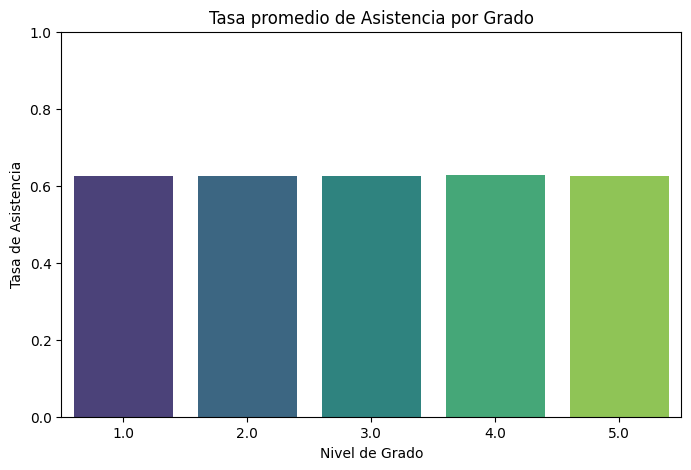

In [141]:
#Ver la tasa de asistencia por grado.
#Unimos el df_attendande con df_students para poder tener la información de la columna 'grade_level'.

# Reset index para acceder a 'student_id' como columna (estaba como índice)
df_students = df_students.reset_index()
df_att_grade = pd.merge(df_attendance, df_students[['student_id', 'grade_level']], on='student_id', how='left')

# Agrupar por 'grade_level' y calcular la tasa de asistencia promedio por grado
att_by_grade = df_att_grade.groupby('grade_level')['att_numeric'].mean().reset_index()

# Visualizar el gráfico
plt.figure(figsize=(8,5))
sns.barplot(data=att_by_grade, x='grade_level', y='att_numeric', palette='viridis')
plt.title('Tasa promedio de Asistencia por Grado')
plt.xlabel('Nivel de Grado')
plt.ylabel('Tasa de Asistencia')
plt.ylim(0,1)
plt.show()

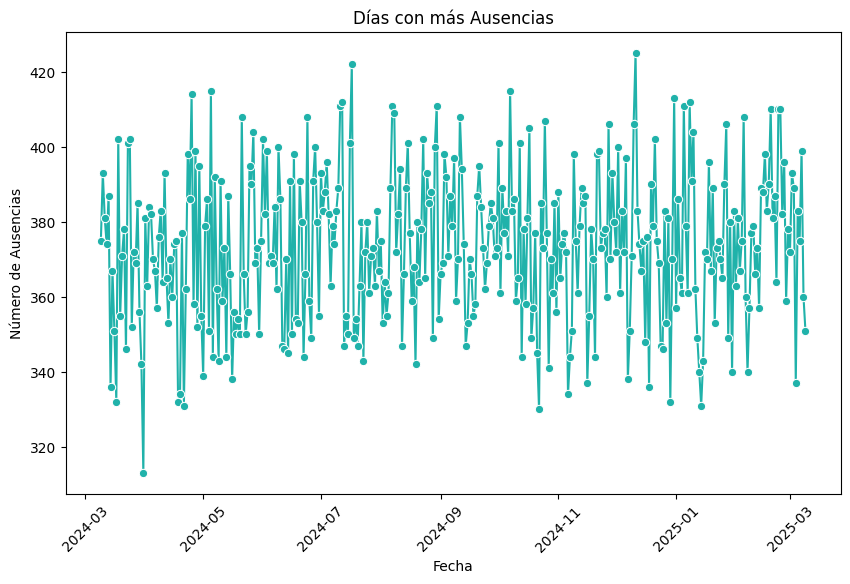

In [ ]:
#Ver los días con más número de ausencias.

#Filtrar solo los registros 'absent' o 'excused'. 
df_absent = df_attendance[df_attendance['att_status'].isin(['absent','excused'])]

#Agrupar df_absent por la columna 'att_date' y contar las ausencias
absences_by_date = df_absent.groupby('att_date').size().reset_index(name = 'absence_count')

#Ordenar de mayor a menor para ver en primer lugar los días con más ausencias
absences_by_date = absences_by_date.sort_values(by = 'absence_count', ascending = False)

#Visualizar el gráfico
plt.figure(figsize =(10,6))
sns.lineplot(data=absences_by_date, x = 'att_date', y = 'absence_count', marker = 'o', color = 'lightseagreen')
plt.title('Días con más Ausencias')
plt.xlabel('Fecha')
plt.ylabel('Número de Ausencias')
plt.xticks(rotation=45)
plt.show()


In [ ]:
#Ver el porcentaje del total de registros representa cada tipo de asistencia
#Usamos value_counts(normalize=True) para obtener el porcentaje de cada tipo de asistencia. Hacemos *100 para obtenerlo en porcentaje.
attendance_counts = round(df_attendance['att_status'].value_counts(normalize=True)*100,2)
print(attendance_counts)

att_status
present       25.12
absent        25.02
late          24.96
left early    12.46
excused       12.45
Name: proportion, dtype: float64


C:\Users\pooo_\AppData\Local\Temp\ipykernel_19976\1037295145.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_attendance, x='att_status', palette='viridis')


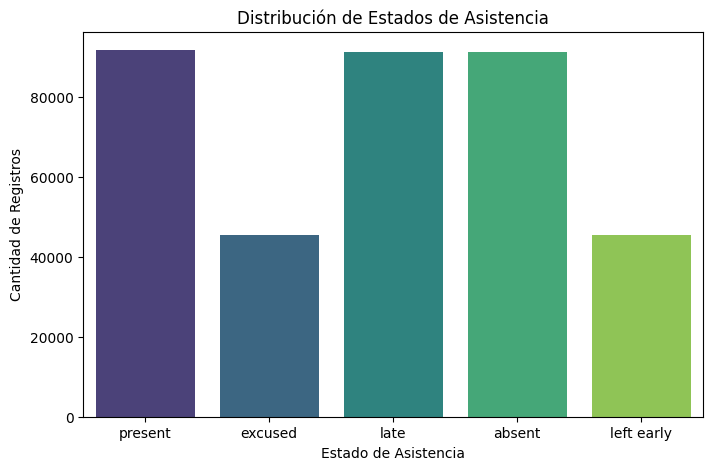

In [ ]:
#🟡🟡Este gráfico cuenta cuántos estudiantes están en cada categoría de asistencia (present, late, absent, etc.).
plt.figure(figsize=(8,5))
sns.countplot(data=df_attendance, x='att_status', palette='viridis')
plt.title('Distribución de Estados de Asistencia')
plt.xlabel('Estado de Asistencia')
plt.ylabel('Cantidad de Registros')
plt.show()


### 3.1. Histogramas para la distribución de variables numéricas

### 3.2. Boxplots para detectar outliers

### 3.3. Gráficos de barras para variables categóricas

### 3.4. Heatmap de correlaciones

# 4. Guardar archivos limpios